<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Daily-Data" data-toc-modified-id="Daily-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Daily Data</a></span></li><li><span><a href="#Monthly-Data" data-toc-modified-id="Monthly-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Monthly Data</a></span></li><li><span><a href="#Weekly-Data" data-toc-modified-id="Weekly-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

366 nights of bat echolocation recordings were made in 2020 at the Hassayampa River Preserve.  No previous echolocation surveys have been carried out of the bat populations on the preserve.  Mist netting and radio-location tracking have been minimally carried out in the past on the preserve but thorough surveys have not been completed.  Being bats are nocturnal and elusive, relatively little is known about them in general and there is minimal information on bats of the preserve.  Specifically, it is not known how common bats are on the preserve, what species are present and use the preseve, and what the seasonal use of the preserve is.  

**Habitat:**

The preserve is located near Wickenburg, AZ in a perennial riparian habitat in the Upper Sonoran Desert.  This habitat is one of the larger intact riparian areas in the Sonoran Desert with major plant communities being composed of *Populus fremontii, Salix goodonii*, and *Prosopis velutina*.  The Surrounding Sonoran Desert Uplands are rocky and semi-mountainous with *Carnegie gigantea, Ambrosia deltoidea, Encelia farinosa*, and *Parkinsonia microphylla* plant associations.  Development in the area has to this point been minimal.  It is hypothesized that this relatively large and intact habitat is ideal habitat for bats.  

**Data collection**

The ultrasonic recorder was placed in the southeastern portion of the preserve in a Populus fremontii and Prosopis velutina open woodland.  Open water was located approximately 50 meters to the south and 100 meters to the northwest.  The Anabat Express zero cross recorder used was set to record nightly from sunset to sunrise.  The area selected for recording was free of clutter that may disrupt echolocation recordings for 30 or more meters.  The recording site was a transitory area for bats between major roosting areas, water sources, and feeding areas.  By avoiding roosting, feeding, and water areas, an unmanageable number of calls were avoided and there was an increased chance that a single bat detection represented a single bat, rather than a single bat’s continued use of the area repeatedly triggering recordings.  All data was analyzed with Wildlife Acoustics Kaleidoscope Pro software to identify each call to the species level.  All species were then verified manually but not all individual calls were verified to species manually.  Three species, Myotis evotis, Myotis occultus, and Myotis thysanodes were identified by Kaleidoscope Pro but could not be verified manually.


**Questions to be answered:**
    1. How many species of bats were detected on the preserve in 2020?
    2. How many detections of each species were there?  This indicates both abundance and activity levels.
    3. How many days during 2020 were each species detected?  This also indicates both abundance and activity but also how important the preserve habitat is to each species.
    4. How does bat activity change by the season?  Subquestions to this could be, 1. Can any type of behavioral patterns be identified?  Migrations?  Fledging of bats born in late spring?  
    5. What format is this data best presented?  Daily?  Weekly averages?  Monthly averages?  Or Savitzky–Golay filter smoothed data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import scipy.signal
import seaborn as sns

In [19]:
df = pd.read_excel('Hassayampa 2020.xlsx')

In [20]:
df.head()

,Unnamed: 0,Desert Pallid Bat,Townsend's Bigeared Bat,Big Brown Bat,Spotted Bat,Greater Mastiff Bat,Underwood's Mastiff Bat,Western Red Bat,Hoary Bat,Silver Haired Bat,...,Cave Myotis,Long-Legged Myotis,Yuma Myotis,Pocketed Freetailed bat,Bit Freetailed bat,Canyon Bat,Mexican Freetailed Bat,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Date,ANTPAL,CORTOW,EPTFUS,EUDMAC,EUMPER,EUMUND,LASBLO,LASCIN,LASNOC,...,MYOVEL,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,TotBatDet,Species
1,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2020-01-02 00:00:00,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,3,3
3,2020-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2020-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,0,1,1


# Data Cleaning

In [21]:
df.columns = df.loc[0,:]
df = df.drop(df.index[0])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       366 non-null    object
 1   ANTPAL     121 non-null    object
 2   CORTOW     18 non-null     object
 3   EPTFUS     200 non-null    object
 4   EUDMAC     0 non-null      object
 5   EUMPER     0 non-null      object
 6   EUMUND     14 non-null     object
 7   LASBLO     93 non-null     object
 8   LASCIN     189 non-null    object
 9   LASNOC     246 non-null    object
 10  LASXAN     98 non-null     object
 11  MACCAL     0 non-null      object
 12  MYOCAL     80 non-null     object
 13  MYOCIL     188 non-null    object
 14  MYOEVO     9 non-null      object
 15  MYOOCC     9 non-null      object
 16  MYOTHY     2 non-null      object
 17  MYOVEL     209 non-null    object
 18  MYOVOL     146 non-null    object
 19  MYOYUM     43 non-null     object
 20  NYCFEM     82 non-null     objec

In [23]:
#Drop species with less than 10 observations.  These species were also further examined and could not be confirmed by sonograms.
df = df.drop(columns = ['EUDMAC', 'EUMPER', 'MACCAL', 'MYOEVO', 'MYOOCC', 'MYOTHY'])
#Change date time format
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
#Fill na's with 0
df = df.fillna(value = 0)

In [25]:
#Make feature of month of detection
df['month'] = pd.DatetimeIndex(df['Date']).month

In [26]:
#Verify that all months have the appropriate number of days.  Note, 2020 had 366 days and 29 days in February.
df.month.value_counts().sort_index()

1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: month, dtype: int64

In [27]:
#Total number of detections for each species in 2020
df.sum()

0
ANTPAL         628
CORTOW          25
EPTFUS        5918
EUMUND          30
LASBLO         268
LASCIN        1267
LASNOC        3124
LASXAN         317
MYOCAL         161
MYOCIL        2507
MYOVEL        9644
MYOVOL        1146
MYOYUM          58
NYCFEM         232
NYCMAC          16
PARHES         588
TADBRA        6773
NOID         19271
TotBatDet    51995
Species       2137
month         2384
dtype: int64

In [28]:
df.columns

Index(['Date', 'ANTPAL', 'CORTOW', 'EPTFUS', 'EUMUND', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'MYOYUM',
       'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA', 'NOID', 'TotBatDet', 'Species',
       'month'],
      dtype='object', name=0)

In [29]:
#Make a dataframe of 0 and 1 for presence and absence of each species for each day over the year.
#Answers the question how many days were each bat species detected in 2020
df01 = df[['ANTPAL', 'CORTOW', 'EPTFUS', 'EUMUND', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'MYOYUM',
       'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA', 'TotBatDet']].astype(bool).astype(int)

In [30]:
#Summing each species presence absence data for each night gives number of days detected in 2020.
df01.sum()

0
ANTPAL       121
CORTOW        18
EPTFUS       200
EUMUND        14
LASBLO        93
LASCIN       189
LASNOC       246
LASXAN        98
MYOCAL        80
MYOCIL       188
MYOVEL       209
MYOVOL       146
MYOYUM        43
NYCFEM        82
NYCMAC        14
PARHES       139
TADBRA       237
TotBatDet    341
dtype: int64

# Daily Data

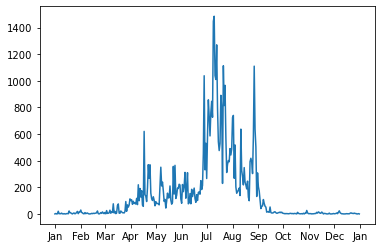

In [31]:
#Plot total bat detections with unsmoothed data
plt.plot(df.Date, df.TotBatDet)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [32]:
#Smooting data
totbat = scipy.signal.savgol_filter(df.TotBatDet, 21, 1)
totbat3 = scipy.signal.savgol_filter(df.TotBatDet, 31, 1)

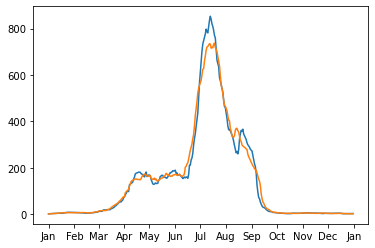

In [33]:
#Plotting smoothed data
plt.plot(df.Date, totbat)
plt.plot(df.Date, totbat3)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

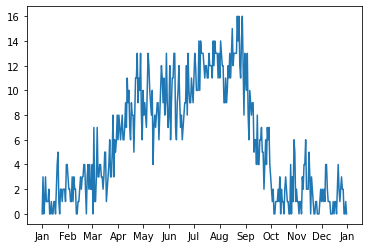

In [34]:
#Plotting unsmoothed total number of species data
plt.plot(df.Date, df.Species)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [35]:
#Smoothing species data
species = scipy.signal.savgol_filter(df.Species, 21, 1)
species3 = scipy.signal.savgol_filter(df.Species, 31, 1)

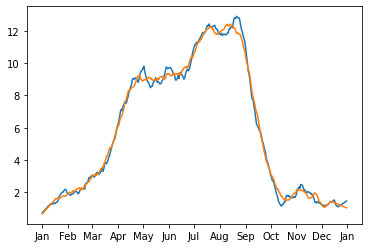

In [36]:
#plotting smoothed species data
plt.plot(df.Date, species)
plt.plot(df.Date, species3)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [37]:
#Smoothing data of one of the most common species 
tadbra = scipy.signal.savgol_filter(df.TADBRA, 21, 1)

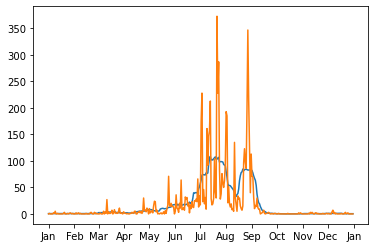

In [38]:
#Plotting smoothed daily data and unsmoothed daily data of TADBRA.
plt.plot(df.Date, tadbra)
plt.plot(df.Date, df.TADBRA)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

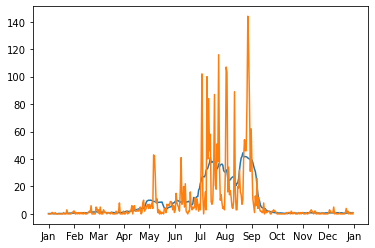

In [39]:
#Plotting smoothed daily data and unsmoothed daily data for LASNOC.
plt.plot(df.Date, scipy.signal.savgol_filter(df.LASNOC, 21, 1))
plt.plot(df.Date, df.LASNOC)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

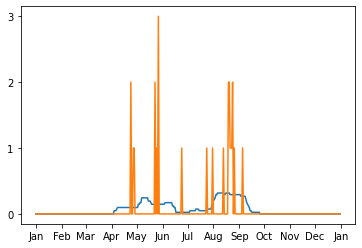

In [40]:
#Plotting smoothed and unsmoothed data of one of the least common species CORTOW.  
#CORTOW is an extremely important species being it is Vulnerable status.
plt.plot(df.Date, scipy.signal.savgol_filter(df.CORTOW, 41, 1))
plt.plot(df.Date, df.CORTOW)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Monthly Data

In [41]:
#Creating a dataframe of weekly means of each species.  This will help smooth the data more.
monthly = df.groupby(['month']).aggregate({'ANTPAL':np.mean, 'CORTOW':np.mean, 'EPTFUS':np.mean, 'EUMUND':np.mean, 'LASBLO':np.mean, 'LASCIN':np.mean,
       'LASNOC':np.mean, 'LASXAN':np.mean, 'MYOCAL':np.mean, 'MYOCIL':np.mean, 'MYOVEL':np.mean, 'MYOVOL':np.mean, 'MYOYUM':np.mean,
       'NYCFEM':np.mean, 'NYCMAC':np.mean, 'PARHES':np.mean, 'TADBRA':np.mean, 'TotBatDet':np.mean, 'Species':np.mean})

In [42]:
#Making column of months
monthly['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

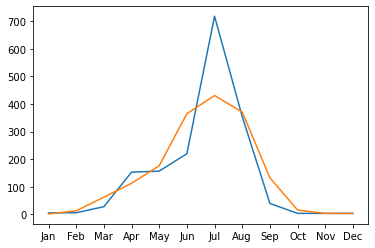

In [44]:
#Plotting monthly total bats detected.
plt.plot(monthly['Month'], monthly['TotBatDet'])
plt.plot(monthly['Month'], scipy.signal.savgol_filter(monthly.TotBatDet, 3, 1))
plt.show()

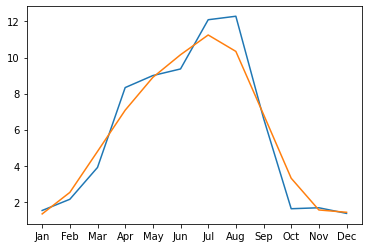

In [45]:
#Plotting monthly total species detected.
plt.plot(monthly['Month'], monthly['Species'])
plt.plot(monthly['Month'], scipy.signal.savgol_filter(monthly.Species, 3, 1))
plt.show()

In [46]:
#Making dataframe of 0 and 1 for presence and absence of each species by month.
month_0_1 = monthly.astype(bool).astype(int)

# Weekly Data

In [47]:
#Creating a dataframe of weekly averages for each species.
#This will help smooth data but provide more detail than the monthly averages.
weekly = df.resample('W', on='Date').mean()

In [48]:
weekly.head()

,ANTPAL,CORTOW,EPTFUS,EUMUND,LASBLO,LASCIN,LASNOC,LASXAN,MYOCAL,MYOCIL,...,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,TotBatDet,Species,month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,0.0,0.0,0.200000,0.0,0.0,0.200000,0.200000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,4.000000,0.200000,0.000000,4.800000,1.400000,1.000000
2020-01-12,0.0,0.0,0.000000,0.0,0.0,0.000000,0.285714,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,1.285714,0.428571,2.000000,0.857143,1.000000
2020-01-19,0.0,0.0,0.142857,0.0,0.0,0.714286,0.142857,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,3.571429,0.142857,0.571429,5.285714,1.142857,1.000000
2020-01-26,0.0,0.0,0.285714,0.0,0.0,0.285714,0.428571,0.0,0.142857,0.0,...,0.0,0.0,0.000000,0.0,1.571429,0.714286,0.571429,4.000000,1.857143,1.000000
2020-02-02,0.0,0.0,0.285714,0.0,0.0,0.285714,0.857143,0.0,0.000000,0.0,...,0.0,0.0,0.285714,0.0,11.000000,0.571429,1.000000,14.285714,2.571429,1.285714


In [49]:
#Make column of data.
weekly['Date'] = weekly.index

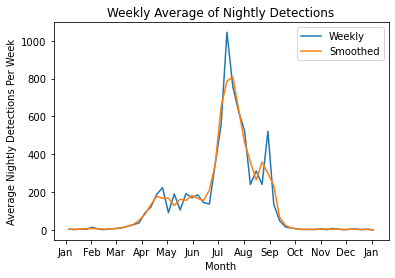

In [50]:
#Plotting weekly average of total bat detections.
plt.plot(weekly.TotBatDet, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.TotBatDet, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

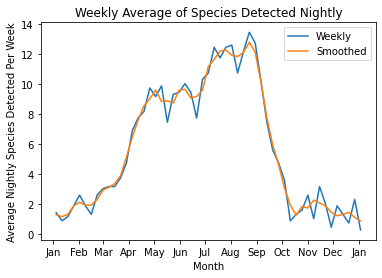

In [51]:
#Plotting average number of species detected weekly.
plt.plot(weekly.Species, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.Species, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Species Detected Per Week')
plt.title('Weekly Average of Species Detected Nightly')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

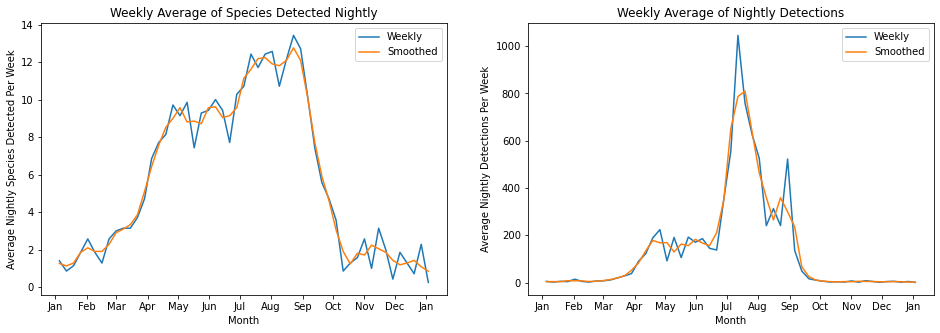

In [52]:
#Plotting the above two plots together in a subplot for better display of data.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

ax1.plot(weekly.Species, label = 'Weekly')
ax1.plot(weekly.Date, scipy.signal.savgol_filter(weekly.Species, 3, 1), label = 'Smoothed')
ax1.legend()
ax1.set(title = 'Weekly Average of Species Detected Nightly', xlabel = 'Month', ylabel = 'Average Nightly Species Detected Per Week')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


ax2.plot(weekly.TotBatDet, label = 'Weekly')
ax2.plot(weekly.Date, scipy.signal.savgol_filter(weekly.TotBatDet, 3, 1), label = 'Smoothed')
ax2.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
ax2.set_title('Weekly Average of Nightly Detections')
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


In [53]:
weeknan = weekly.replace(0, np.nan)

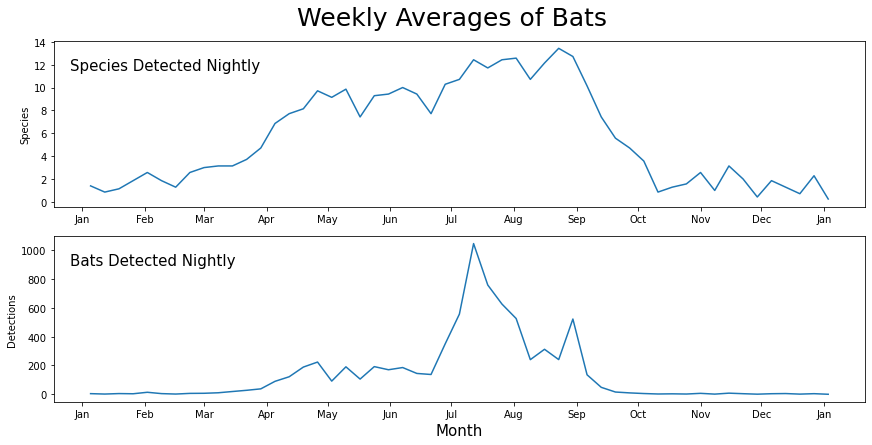

In [54]:
#Plotting the above two plots together in a subplot for better display of data.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,6))
fig.suptitle('Weekly Averages of Bats', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

#Total species
ax1.plot(weekly.Species, label = 'Weekly')
ax1.text(0.02, 0.85, 'Species Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes)
ax1.set(ylabel = 'Species')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#Total Detections
ax2.plot(weekly.TotBatDet, label = 'Weekly')
ax2.set(ylabel = 'Detections')
ax2.text(0.02, 0.85, 'Bats Detected Nightly', fontsize = 15, horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes)
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xlabel("Month", fontsize = '15')
plt.show()

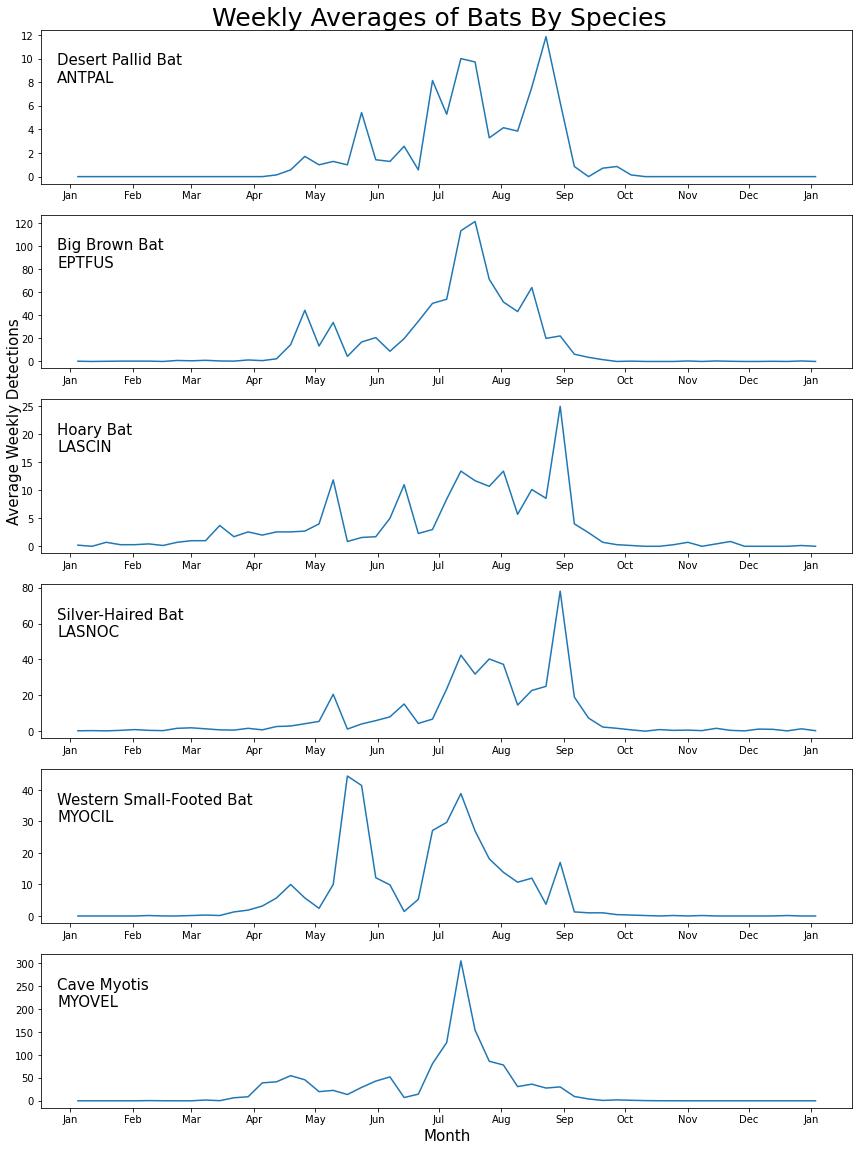

In [55]:
#Plotting the most common species and species of interest.

fig, (ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(0.0000000001, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#ANTPAL
ax3.plot(weekly.ANTPAL, label = 'Weekly')
#ax3.set(ylabel = 'Detections')
ax3.text(0.02, 0.85, 'Desert Pallid Bat \nANTPAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes)
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#EPTFUS
ax4.plot(weekly.EPTFUS, label = 'Weekly')
#ax4.set(ylabel = 'Detections')
ax4.text(0.02, 0.85, 'Big Brown Bat \nEPTFUS', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes)
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#LASCIN
ax5.plot(weekly.LASCIN, label = 'Weekly')
#ax5.set(ylabel = 'Detections')
ax5.text(0.02, 0.85, 'Hoary Bat \nLASCIN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax5.transAxes)
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#LASNOC
ax6.plot(weekly.LASNOC, label = 'Weekly')
#ax6.set(ylabel = 'Detections')
ax6.text(0.02, 0.85, 'Silver-Haired Bat \nLASNOC', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax6.transAxes)
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#MYOCIL
ax7.plot(weekly.MYOCIL, label = 'Weekly')
#ax7.set(ylabel = 'Detections')
ax7.text(0.02, 0.85, 'Western Small-Footed Bat \nMYOCIL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax7.transAxes)
ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#MYOVEL
ax8.plot(weekly.MYOVEL, label = 'Weekly')
#ax8.set(ylabel = 'Detections')
ax8.text(0.02, 0.85, 'Cave Myotis \nMYOVEL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax8.transAxes)
ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

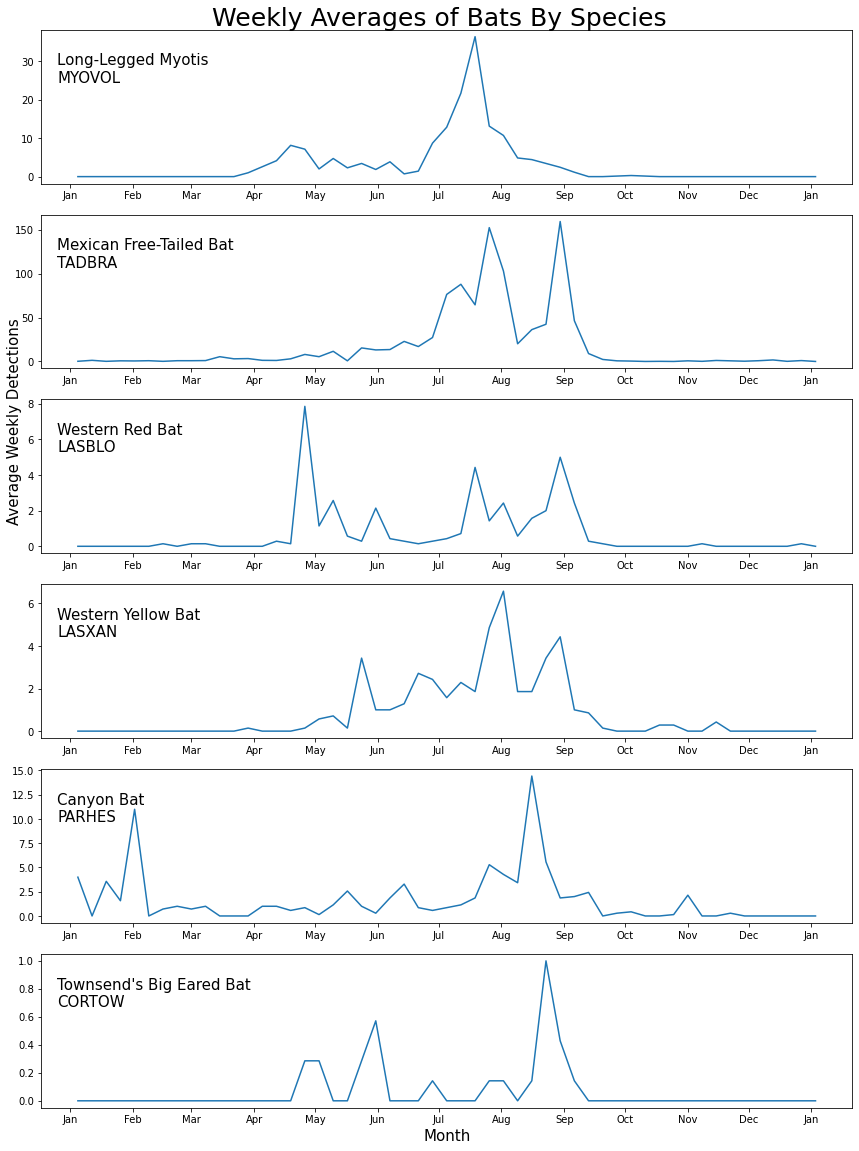

In [56]:
#Plotting the most common species and species of interest.  
#Two different subplots for better viewing of data.

fig, (ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(0.0000000001, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#MYOVOL
ax9.plot(weekly.MYOVOL, label = 'Weekly')
#ax9.set(ylabel = 'Detections')
ax9.text(0.02, 0.85, 'Long-Legged Myotis \nMYOVOL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax9.transAxes)
ax9.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#TADBRA
ax10.plot(weekly.TADBRA, label = 'Weekly')
#ax10.set(ylabel = 'Detections')
ax10.text(0.02, 0.85, 'Mexican Free-Tailed Bat \nTADBRA', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax10.transAxes)
ax10.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax10.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#LASBLO
ax11.plot(weekly.LASBLO, label = 'Weekly')
#ax11.set(ylabel = 'Detections')
ax11.text(0.02, 0.85, 'Western Red Bat \nLASBLO', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax11.transAxes)
ax11.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax11.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#LASXAN
ax12.plot(weekly.LASXAN, label = 'Weekly')
#ax12.set(ylabel = 'Detections')
ax12.text(0.02, 0.85, 'Western Yellow Bat \nLASXAN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax12.transAxes)
ax12.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax12.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#PARHES
ax13.plot(weekly.PARHES, label = 'Weekly')
#ax13.set(ylabel = 'Detections')
ax13.text(0.02, 0.85, 'Canyon Bat \nPARHES', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax13.transAxes)
ax13.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax13.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#CORTOW
ax14.plot(weekly.CORTOW, label = 'Weekly')
plt.xlabel('Month')
#ax14.set(ylabel = 'Detections')
ax14.text(0.02, 0.85, "Townsend's Big Eared Bat \nCORTOW", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax14.transAxes)
ax14.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax14.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

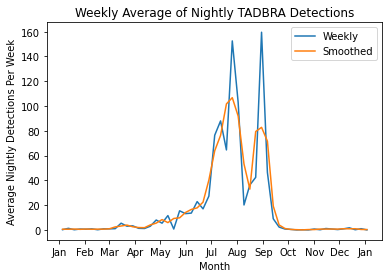

In [57]:
plt.plot(weekly.TADBRA, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.TADBRA, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly TADBRA Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

In [58]:
weekly.sum()

0
ANTPAL         89.714286
CORTOW          3.571429
EPTFUS        845.485714
EUMUND          4.285714
LASBLO         38.285714
LASCIN        181.057143
LASNOC        446.450000
LASXAN         45.285714
MYOCAL         23.000000
MYOCIL        358.142857
MYOVEL       1377.714286
MYOVOL        163.714286
MYOYUM          8.285714
NYCFEM         33.142857
NYCMAC          2.285714
PARHES         85.142857
TADBRA        967.628571
NOID         2753.107143
TotBatDet    7429.442857
Species       305.792857
month         346.000000
dtype: float64

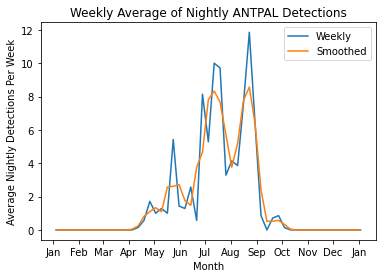

In [59]:
#Plotting ANTPAL weekly averages.

plt.plot(weekly.ANTPAL, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.ANTPAL, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly ANTPAL Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

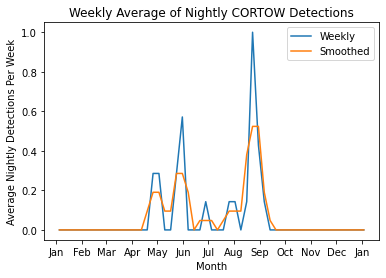

In [60]:
#Plotting CORTOW weekly averages.

plt.plot(weekly.CORTOW, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.CORTOW, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly CORTOW Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

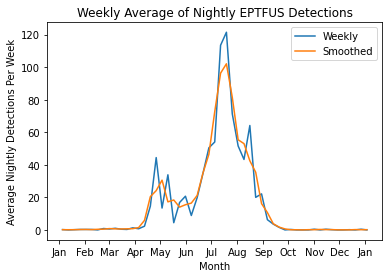

In [61]:
#Plotting EPTFUS weekly averages.

plt.plot(weekly.EPTFUS, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.EPTFUS, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly EPTFUS Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

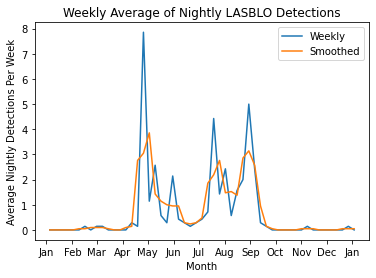

In [62]:
#Plotting LASBLO weekly averages.

plt.plot(weekly.LASBLO, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASBLO, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly LASBLO Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

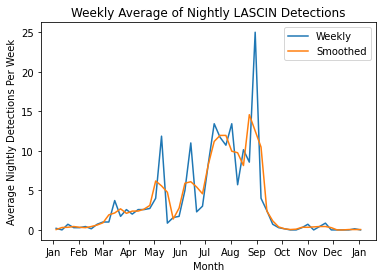

In [63]:
#Plotting LASCIN weekly averages.

plt.plot(weekly.LASCIN, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASCIN, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly LASCIN Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

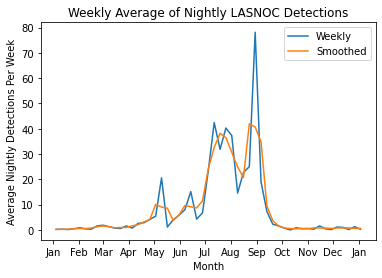

In [64]:
#Plotting LASNOC weekly averages.

plt.plot(weekly.LASNOC, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASNOC, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly LASNOC Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

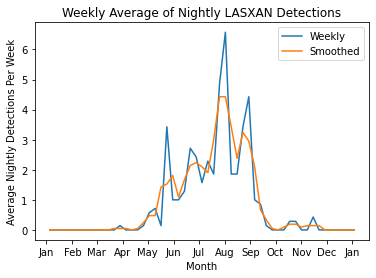

In [65]:
#Plotting LASXAN weekly averages.

plt.plot(weekly.LASXAN, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASXAN, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly LASXAN Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

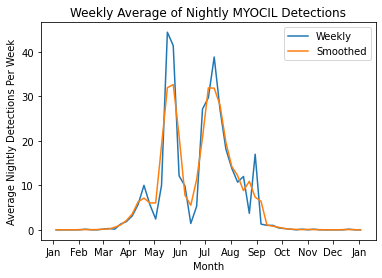

In [66]:
#Plotting MYOCIL weekly averages.

plt.plot(weekly.MYOCIL, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOCIL, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly MYOCIL Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

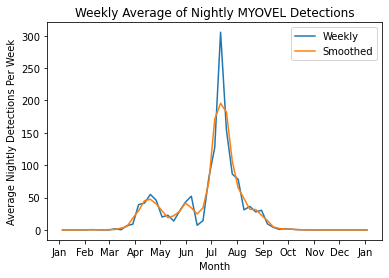

In [67]:
#Plotting MYOVEL weekly averages.

plt.plot(weekly.MYOVEL, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVEL, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly MYOVEL Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

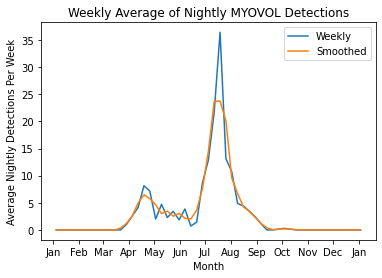

In [68]:
#Plotting MYOVOL weekly averages.

plt.plot(weekly.MYOVOL, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVOL, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly MYOVOL Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

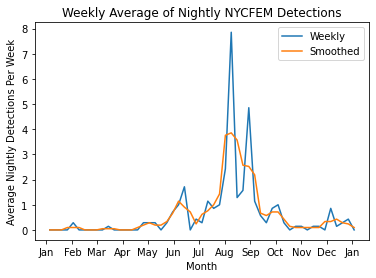

In [69]:
#Plotting NYCFEM weekly averages.

plt.plot(weekly.NYCFEM, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.NYCFEM, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly NYCFEM Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

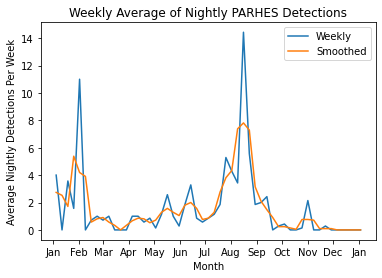

In [70]:
#Plotting PARHES weekly averages.

plt.plot(weekly.PARHES, label = 'Weekly')
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.PARHES, 3, 1), label = 'Smoothed')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly PARHES Detections')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

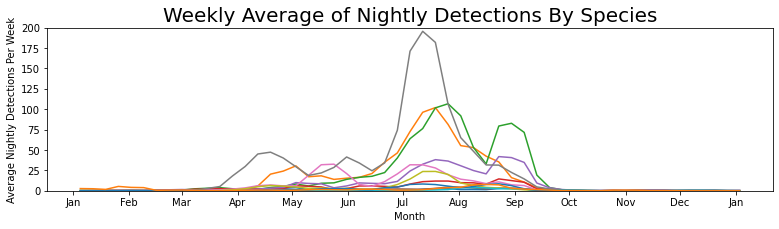

In [71]:
#Plotting 12 most common species of smoothed weekly averages all on same plot to look for patterns.

plt.figure(figsize = (13, 3))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASBLO, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.EPTFUS, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.TADBRA, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASCIN, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASNOC, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASXAN, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOCIL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVEL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVOL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.NYCFEM, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.ANTPAL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.PARHES, 3, 1))
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections By Species', fontsize = 20)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0, 200])
plt.show()

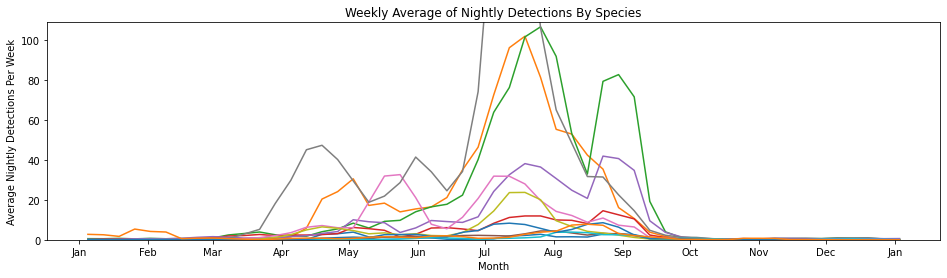

In [72]:
#Same as above but using a different scale to see if data looks cleaner.

plt.figure(figsize = (16, 4))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASBLO, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.EPTFUS, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.TADBRA, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASCIN, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASNOC, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.LASXAN, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOCIL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVEL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.MYOVOL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.NYCFEM, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.ANTPAL, 3, 1))
plt.plot(weekly.Date, scipy.signal.savgol_filter(weekly.PARHES, 3, 1))
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections By Species')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0, 109])
plt.show()

In [73]:
weeknan = weekly.replace(0, np.nan)

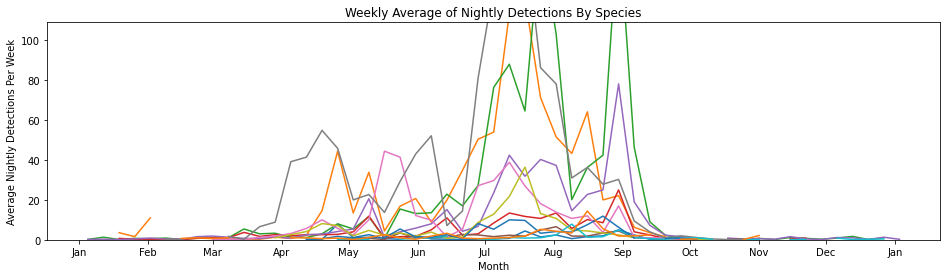

In [74]:
#Plotting weekly data with 0's removed

plt.figure(figsize = (16, 4))
plt.plot(weekly.Date, weeknan.LASBLO)
plt.plot(weekly.Date, weeknan.EPTFUS)
plt.plot(weekly.Date, weeknan.TADBRA)
plt.plot(weekly.Date, weeknan.LASCIN)
plt.plot(weekly.Date, weeknan.LASNOC)
plt.plot(weekly.Date, weeknan.LASXAN)
plt.plot(weekly.Date, weeknan.MYOCIL)
plt.plot(weekly.Date, weeknan.MYOVEL)
plt.plot(weekly.Date, weeknan.MYOVOL)
plt.plot(weekly.Date, weeknan.NYCFEM)
plt.plot(weekly.Date, weeknan.ANTPAL)
plt.plot(weekly.Date, weeknan.PARHES)
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections By Species')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_ylim([0, 109])
plt.show()

# Conclusion

**Seasonal species richness**

A total of 17 species of bats were detected in 2020.  Species richness increased from February until peaking at the end of August.  Species richness then decreased during the month of September until only a few species were detected nightly starting in the middle of October, returning to levels seen prior to February.  

**Most common species**

The most common species detected were MYOVEL, TADBRA, EPTFUS, LASNOC, LASCIN, and MYOVOL.  These specie utilized the preserve between 146 and 237 days in 2020 (at the site of the detector).  

**Species of interest**

CORTOW is a federally listed Vulnerable species and was detected 25 times and 18 days in 2020.
LASXAN is a US Forest Service listed Sensitive species and was detected 317 times and 98 days.
LASBLO is a US Forest Service listed Sensitive species and was detected 268 times and 93 days.
Further examination of these species by surveying different habitats is warranted by these detections.

**Seasonal activity levels**

Overall activity levels increased slightly from winter levels starting in late March, leveling off through the begining of July.  July had an extremely high level of activity that decfreased into August, with low levels of activity taking place after the middle of September.  The majority of activity taking place in July and August can be attributed to TABRA and secondarily to EPTFUS and MYOVEL.  Throughout the year, MYOVEL was found to be the most active species with approxymately 30% more detections than TADBRA, the second most detected species.  

**Bat use of the Hassayampa River Preserve**

Bats were detected on the preserve 341 days in 2020.  All days were bats were not detected were between January and February as well as November and December.  

**Migrations or bats coming out of hibernation**

Spring migration is more gradual than fall.  In spring, both activity and species increased gradually between late April and into June.  Species richness and activity decreasing rapidly in September.  Migrations were difficult to identify due to high variability of the data.  However, it is possible that a migration in September of TADBRA was identified, which coincides with the known migration for this species.  Additionally, a migration for MYOVEL was also possibly identified.

**Possibly recent fledgling activity**

A very sharp increase of bat activity was seen in July and into August.  This is possibly due to young fledgling bats that were born in late May or early June.  

**Significance of findings to the preserve**

The Hassayampa river preserve has a very high level of bat species and activity.  The 17 confirmed species utilizing the preserve make this one of the most diverse bat communities in the United States.  This diversity is likely owed to the combination of intact desert habitat as well as riparian habitat with perennial water.  A number of very important species utilize the preserve throughout the year.  Based off of these findings, more work can be carried out to monitor bats in the future to identify changes in species use of the preserve.  Additionally, searches for roosts could be carried out so they can be protected.  Additional habitats in the area should also be surveyed in order to identify bat use and potentially identify different species or how species utilize the different habitats.  